In [2]:
import glob
import os
import tarfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import get_file

## Download data

In [3]:
dataset_url = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
data_name = 'cinic10'
file_extension = 'tar.gz'
file_name = '.'.join([data_name, file_extension])

In [4]:
# download CINIC-10 dataset

downloaded_file_location = get_file(origin = dataset_url, fname = file_name, extract = False)

687554560/687544992 [==============================] - 2165s 3us/step


In [5]:
# decompress data

data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit = 1)
data_directory = os.path.sep.join([data_directory, data_name])

if not os.path.exists(data_directory):
    tar = tarfile.open(downloaded_file_location)
    tar.extractall(data_directory)

In [6]:
# load all image paths

data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])
image_paths = list(glob.glob(data_pattern))
print(f'There are {len(image_paths):,} images in the dataset')

There are 270,000 images in the dataset


## Display an image

In [8]:
# load a single image and print its metadata

sample_img = load_img(image_paths[0])
print(f'Image type: {type(sample_img)}')
print(f'Image format: {sample_img.format}')
print(f'Image mode: {sample_img.mode}')
print(f'Image size: {sample_img.size}')

Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
Image format: PNG
Image mode: RGB
Image size: (32, 32)


In [10]:
# convert an image to a NumPy array

sample_img_array = img_to_array(sample_img)
print(f'Image type: {type(sample_img_array)}')
print(f'Image array shape: {sample_img_array.shape}')

Image type: <class 'numpy.ndarray'>
Image array shape: (32, 32, 3)


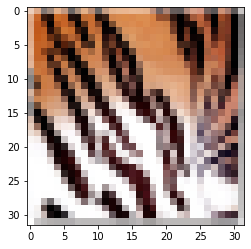

In [13]:
# display the sample image

plt.imshow(sample_img_array / 255.0)

## Iterate over dataset

In [14]:
# load a batch of images and rescale to range [0, 1]

image_generator = ImageDataGenerator(horizontal_flip = True, rescale = 1.0 / 255.0)

Found 270000 images belonging to 3 classes.


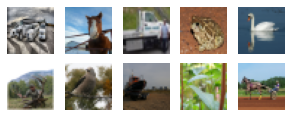

In [15]:
# display a random batch of 10 images

batch_size = 10

iterator = (image_generator.flow_from_directory(directory = data_directory, batch_size = batch_size))

for batch, _ in iterator:
    plt.figure(figsize = (5, 5))
    for index, image in enumerate(batch, start = 1):
        ax = plt.subplot(5, 5, index)
        plt.imshow(image)
        plt.axis('off')
    plt.show()
    break